In [140]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

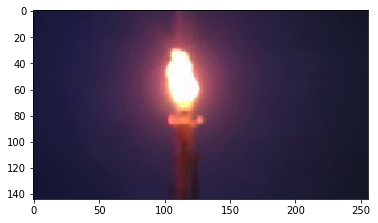

In [210]:
image = mpimg.imread('./flareimg/1234.jpg')
plt.imshow(image)


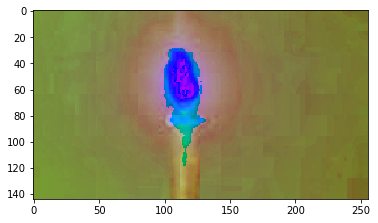

In [211]:
hlsimage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hlsimage)

In [212]:
hlsimage = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)


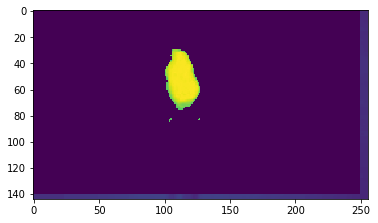

In [213]:

#flame = [:,:,1]>200
flame = hlsimage[:,:,1]
for x in range(0,140):
    for y in range(0,250):
        if flame[x,y]<190:
            flame[x,y]=0
plt.imshow(flame)
            

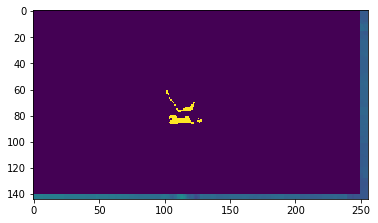

In [214]:
# smoke = [;,;,1]<100 and [:,:,2] >200
smoke = hlsimage[:,:,2]
for x in range(0,140):
    for y in range(0,250):
        if hlsimage[x,y,1]<150 and hlsimage[x,y,2]>200:
            smoke[x,y]=255
        else:
            smoke[x,y]=0
plt.imshow(smoke)
            

In [215]:
smokearea = 0
for y in range(0, 240):
    x = 0
    for x in range(0,120):
        #find the minimum Y
        if smoke[x,y]>0:
            smokearea += 1
        x += 1
    y += 1    
    
print('smoke Area ',smokearea)


smoke Area  139


In [216]:
flamearea = 0
for y in range(0, 240):
    x = 0
    for x in range(0,120):
        #find the minimum Y
        if flame[x,y]>0:
            flamearea += 1
        x += 1
    y += 1    
    
print('Flame Area ',flamearea)


Flame Area  860


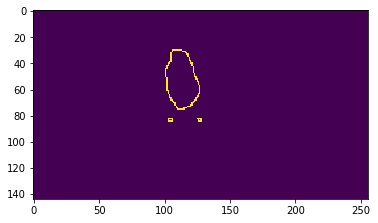

In [217]:
blur = cv2.GaussianBlur(flame,(3,3),0)
canny = cv2.Canny(blur,200, 255)
plt.imshow(canny)

Flame Height  30
Flame Bottom 84
Flame Left  101
Flame Right  128
Flame Envelope Area  998


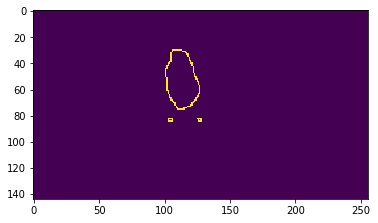

In [218]:
plt.imshow(canny)
points = []
minx = 250
miny = 250
maxx = 0
maxy = 0
area = 0
for y in range(0, 200):
    x = 0
    yhit =y
    xhit1 = 120
    xhit2 = 0
    for x in range(0,120):
        #find the minimum Y
        if canny[x,y]>0:
            point = [x,y]
            if x<xhit1:
                xhit1 = x
            if x>xhit2:
                xhit2 = x
            
            points.append(point)
            if minx > x:
                minx = x
            if miny > y:
                miny = y
            if maxx < x:
                maxx = x
            if maxy <y:
                maxy = y
        x += x
    if xhit1 != 120:
        area += (xhit2-xhit1)
    
    y += y       
    
print('Flame Height ', minx)
print('Flame Bottom', maxx)
print('Flame Left ', miny)
print('Flame Right ',maxy)
print('Flame Envelope Area ',area)
